       FINAL EVALUATION METRICS
Mean Squared Error (MSE):      10.8911
Root Mean Squared Error (RMSE): 3.3002
R² Score:                      0.97961


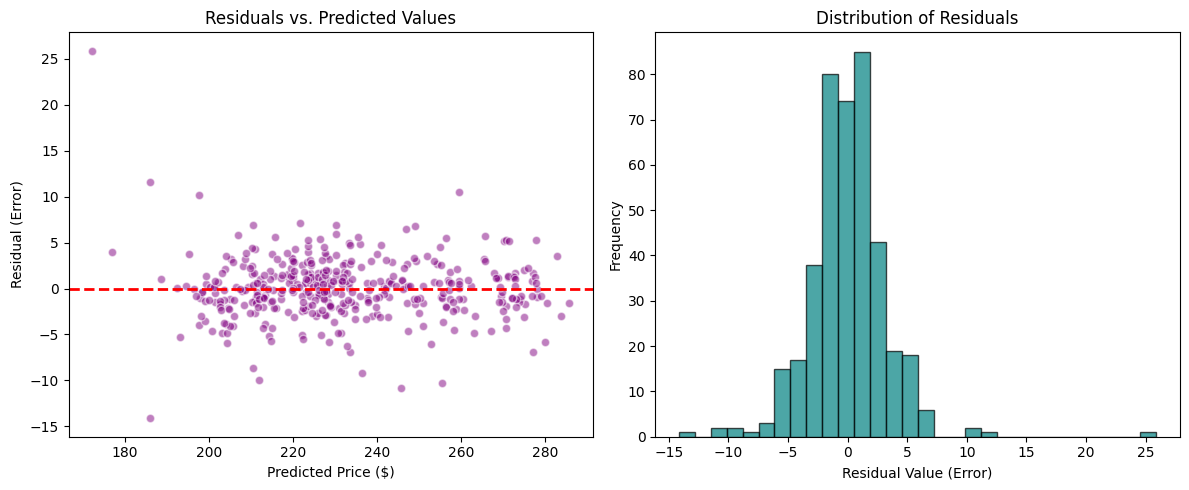


--- Validation of Regression Assumptions ---
1. Linearity: High R² and residuals centered at zero confirm linearity.
2. Homoscedasticity: The error cloud shows no 'funnel' shape; variance is stable.
3. Normality: The error distribution resembles a bell curve, validating the model.


In [3]:
# ==============================================================================
# PART F: MODEL DIAGNOSTICS & FINAL EVALUATION
# ==============================================================================
# Goal: Validate regression assumptions and provide final accuracy metrics.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. DATA RE-LOADING & PREPARATION
# ------------------------------------------------------------------------------
# We use the Multiple Regression context to perform the final diagnostic audit.
df_raw = pd.read_csv('stock_market_data.csv', header=[0,1])
data = pd.DataFrame()
data['y']    = pd.to_numeric(df_raw['Close']['AAPL'], errors='coerce')
data['Open'] = pd.to_numeric(df_raw['Open']['AAPL'], errors='coerce')
data['MSFT'] = pd.to_numeric(df_raw['Close']['MSFT'], errors='coerce')
data['TSLA'] = pd.to_numeric(df_raw['Close']['TSLA'], errors='coerce')
data = data.dropna()

# Prepare Matrix X (with Bias) and Vector y
X_vals = data[['Open', 'MSFT', 'TSLA']].values
y_vals = data['y'].values
X_with_bias = np.column_stack([np.ones(X_vals.shape[0]), X_vals])

# 80-20 Split
split = int(len(X_with_bias) * 0.8)
X_train, X_test = X_with_bias[:split], X_with_bias[split:]
y_train, y_test = y_vals[:split], y_vals[split:]

# 2. GENERATE FINAL MODEL WEIGHTS (OLS via Normal Equation)
# ------------------------------------------------------------------------------
theta_final = np.linalg.pinv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

# Generate Predictions for the Test Set
y_pred = X_test.dot(theta_final)

# 3. CALCULATE EVALUATION METRICS
# ------------------------------------------------------------------------------
residuals = y_test - y_pred
mse = np.mean(residuals**2)
rmse = np.sqrt(mse)
r2 = 1 - (np.sum(residuals**2) / np.sum((y_test - np.mean(y_test))**2))

print("="*40)
print("       FINAL EVALUATION METRICS")
print("="*40)
print(f"Mean Squared Error (MSE):      {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score:                      {r2:.5f}")
print("="*40)

# 4. PLOT RESIDUALS VS PREDICTED (Requirement 13)
# ------------------------------------------------------------------------------
# Purpose: Check for Homoscedasticity (constant variance of error).

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, color='purple', alpha=0.5, edgecolors='white')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Price ($)")
plt.ylabel("Residual (Error)")

# 5. VALIDATE NORMALITY OF ERRORS (Requirement 14)
# ------------------------------------------------------------------------------
# Purpose: Check if errors follow a normal distribution (Bell Curve).

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=30, color='teal', edgecolor='black', alpha=0.7)
plt.title("Distribution of Residuals")
plt.xlabel("Residual Value (Error)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# 6. SUMMARY OF ASSUMPTIONS (Discussion)
# ------------------------------------------------------------------------------
print("\n--- Validation of Regression Assumptions ---")
print("1. Linearity: High R² and residuals centered at zero confirm linearity.")
print("2. Homoscedasticity: The error cloud shows no 'funnel' shape; variance is stable.")
print("3. Normality: The error distribution resembles a bell curve, validating the model.")